# Foundations for Inference - Sampling Distributions

<img src="images/Ames.jpg"/>

### The data

We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor's  office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010.  This collection represents our population of  interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population. Let's load the data.

### Libraries

In [1]:
#install.packages("package")
library(statsr)
library(dplyr)
library(shiny)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Load Data

In [2]:
data(ames)
head(ames)

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,⋯,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,526301100,1656,215000,20,RL,141,31770,Pave,NA,⋯,0,0,NA,NA,NA,0,5,2010,WD,Normal
2,526350040,896,105000,20,RH,80,11622,Pave,NA,⋯,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
3,526351010,1329,172000,20,RL,81,14267,Pave,NA,⋯,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
4,526353030,2110,244000,20,RL,93,11160,Pave,NA,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal
5,527105010,1629,189900,60,RL,74,13830,Pave,NA,⋯,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
6,527105030,1604,195500,60,RL,78,9978,Pave,NA,⋯,0,0,NA,NA,NA,0,6,2010,WD,Normal


We see that there are quite a few variables in the data set, enough to do a  very in-depth analysis. For this lab, we'll restrict our attention to just  two of the variables: the above ground living area of the house in square feet 
(`area`) and the sale price (`price`).

We can explore the distribution of areas of homes in the population of home sales visually and with summary statistics. Let's first create a visualization, a histogram:

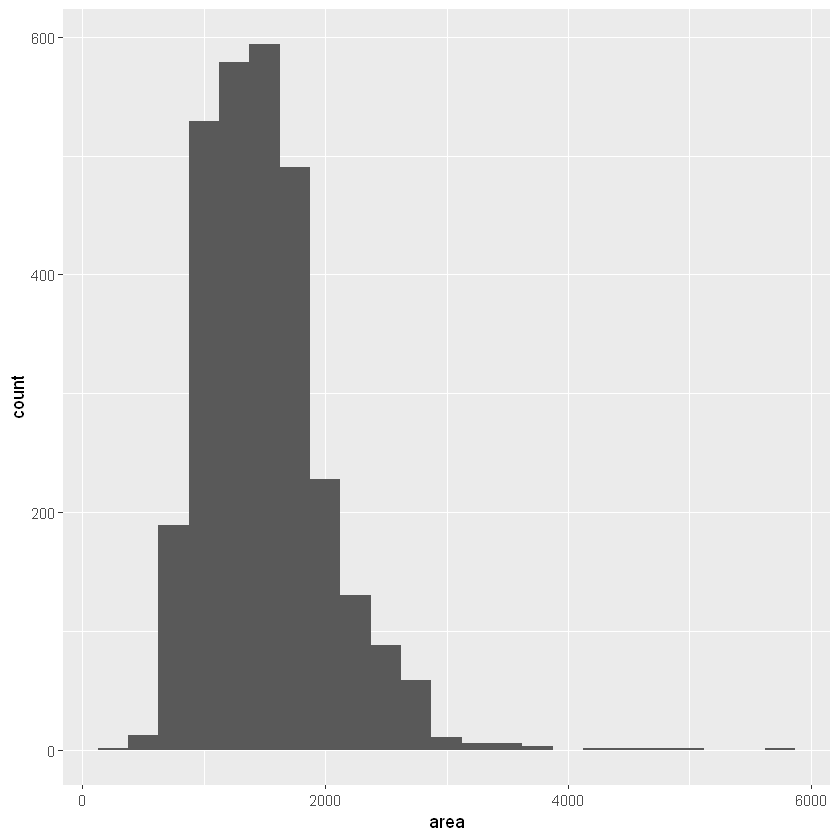

In [3]:
ggplot(data = ames, aes(x = area)) + geom_histogram(binwidth = 250)

Let's also obtain some summary statistics. Note that we can do this using the `summarise` function. We can calculate as many statistics as we want using this function, and just string along the results. Some of the functions below should
be self explanatory (like `mean`, `median`, `sd`, `IQR`, `min`, and `max`). A new function here is the `quantile` function which we can use to calculate  values corresponding to specific percentile cutoffs in the distribution. For
example `quantile(x, 0.25)` will yield the cutoff value for the 25th percentile (Q1) in the distribution of x. Finding these values are useful for describing the distribution, as we can use them for descriptions like *"the middle 50% of the 
homes have areas between such and such square feet"*.

In [4]:
ames %>%
  summarise(mu = mean(area), pop_med = median(area), 
            sigma = sd(area), pop_iqr = IQR(area),
            pop_min = min(area), pop_max = max(area),
            pop_q1 = quantile(area, 0.25),  # first quartile, 25th percentile
            pop_q3 = quantile(area, 0.75))  # third quartile, 75th percentile

mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1499.69,1442,505.5089,616.75,334,5642,1126,1742.75


### The unknown sampling distribution

In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a sample, we can use the following command to survey the population.

In [5]:
samp1 <- ames %>%
  sample_n(size = 50)

This command collects a simple random sample of `size` 50 from the `ames` dataset, which is assigned to `samp1`. This is like going into the City Assessor's database and pulling up the files on 50 random home sales. Working with these 50 files would be considerably simpler than working with all 2930 home sales.

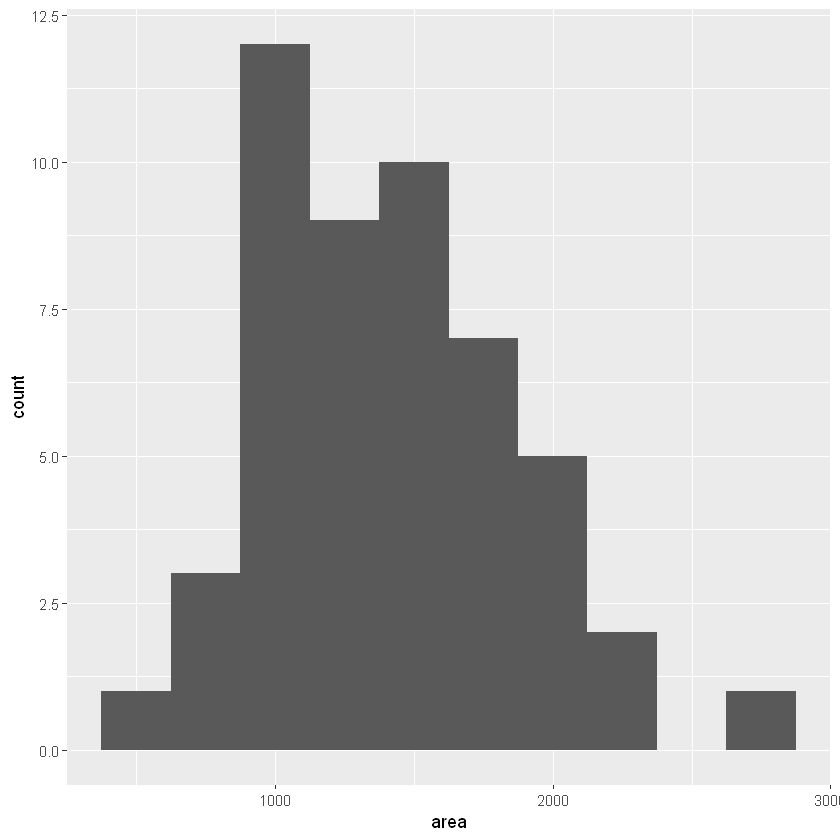

In [6]:
ggplot(data = samp1, aes(x = area)) + geom_histogram(binwidth = 250)

If we're interested in estimating the average living area in homes in Ames using the sample, our best single guess is the sample mean.

In [7]:
samp1 %>%
  summarise(x_bar = mean(area))

x_bar
<dbl>
1403.5


Depending on which 50 homes you selected, your estimate could be a bit above or a bit below the true population mean of 1,499.69 square feet. In general, though, the sample mean turns out to be a pretty good estimate of the average living area, and we were able to get it by sampling less than 3\% of the population.

Let's take one more sample of size 50, and view the mean area in this sample:

In [8]:
ames %>%
  sample_n(size = 50) %>%
  summarise(x_bar = mean(area))

x_bar
<dbl>
1433.52


Not surprisingly, every time we take another random sample, we get a different sample mean. It's useful to get a sense of just how much variability we 
should expect when estimating the population mean this way. The distribution of sample means, called the *sampling distribution*, can help us understand 
this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the 
above steps many times. Here we will generate 15,000 samples and compute the sample mean of each. Note that we are sampling with replacement, 
`replace = TRUE` since sampling distributions are constructed with sampling with replacement.

`summarise()` ungrouping output (override with `.groups` argument)



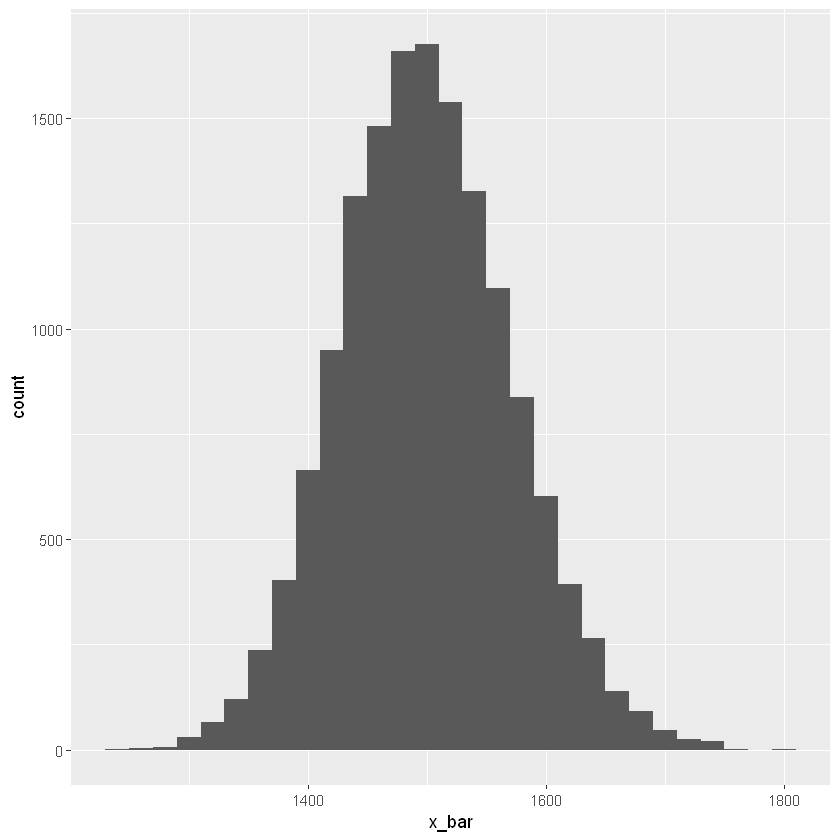

In [9]:
sample_means50 <- ames %>%
                    rep_sample_n(size = 50, reps = 15000, replace = TRUE) %>%
                    summarise(x_bar = mean(area))

ggplot(data = sample_means50, aes(x = x_bar)) +
  geom_histogram(binwidth = 20)

Here we use R to take 15,000 samples of size 50 from the population, calculate the mean of each sample, and store each result in a vector called `sample_means50`. Next, we review how this set of code works.

How many elements are there in `sample_means50`? Describe the sampling distribution, and be sure to specifically note its center. Make sure to include a plot of the distribution in your answer.

Obs_sm50,mean_sm50
<int>,<dbl>
15000,1499.013


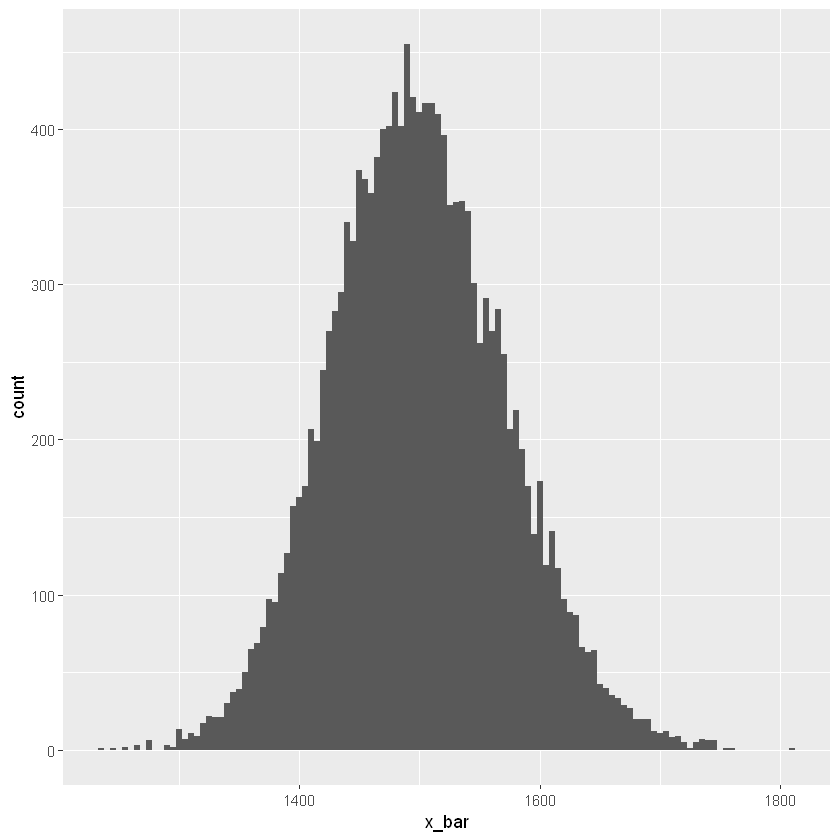

In [10]:
sample_means50 %>% summarise(Obs_sm50 = n(), mean_sm50 = mean(x_bar) )

ggplot(data = sample_means50, aes(x = x_bar)) + geom_histogram(binwidth = 5)

### Interlude: Sampling distributions

The idea behind the `rep_sample_n` function is *repetition*. Earlier we took a single sample of size `n` (50) from the population of all houses in Ames. With this new function we are able to repeat this sampling procedure `rep` times in order
to build a distribution of a series of sample statistics, which is called the **sampling distribution**. 

Note that in practice one rarely gets to build sampling distributions, because we rarely have access to data from the entire population. 

Without the `rep_sample_n` function, this would be painful. We would have to manually run the following code 15,000 times. 

In [11]:
ames %>%
  sample_n(size = 50) %>%
  summarise(x_bar = mean(area))

x_bar
<dbl>
1555.4


As well as store the resulting sample means each time in a separate vector.

Note that for each of the 15,000 times we computed a mean, we did so from a **different** sample!

To make sure you understand how sampling distributions are built, and exactly what the `sample_n` and `do` function do, try modifying the code to create a sampling distribution of **25 sample means** from **samples of size 10**, and put them in a data frame named `sample_means_small`. Print the output. How many observations are there in this object called `sample_means_small`? What does each observation represent?

In [12]:
sample_means_small <- ames %>% rep_sample_n(size = 10, reps = 25, replace = TRUE) %>%
                    summarise(x_bar_sms = mean(area))

`summarise()` ungrouping output (override with `.groups` argument)



In [13]:
head(sample_means_small)

replicate,x_bar_sms
<int>,<dbl>
1,1640.4
2,1889.0
3,1538.1
4,1607.4
5,1564.2
6,1380.2


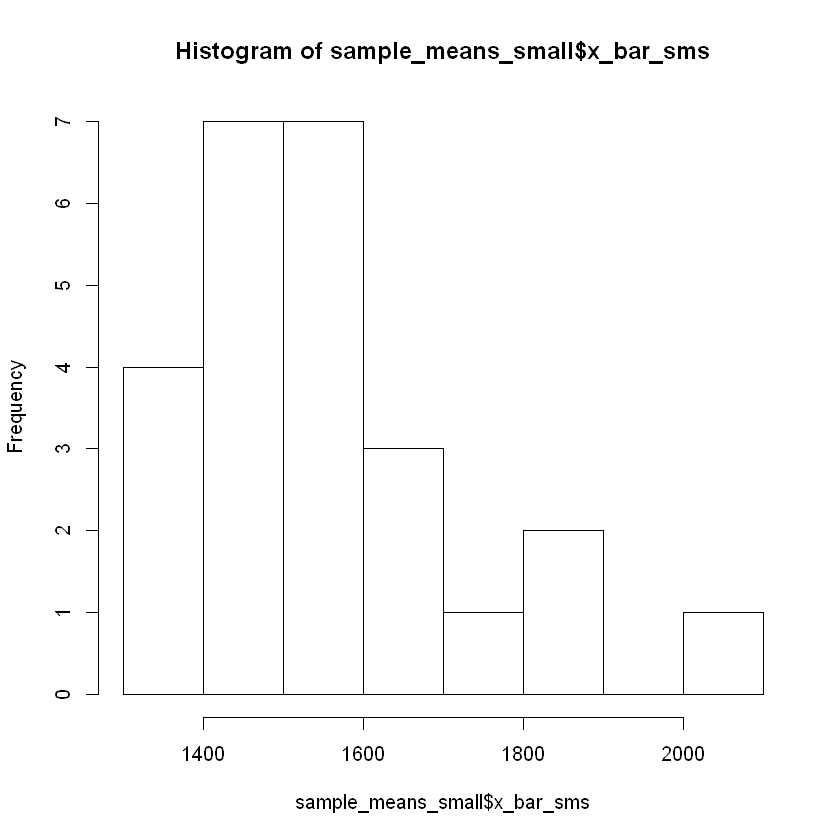

In [14]:
hist(sample_means_small$x_bar_sms)

In [15]:
nrow(sample_means_small)

[1] 25

Each element represents a mean square footage from a simple random sample of 10 houses.

### Sample size and the sampling distribution

Mechanics aside, let's return to the reason we used the `rep_sample_n` function: to compute a sampling distribution, specifically, this one.

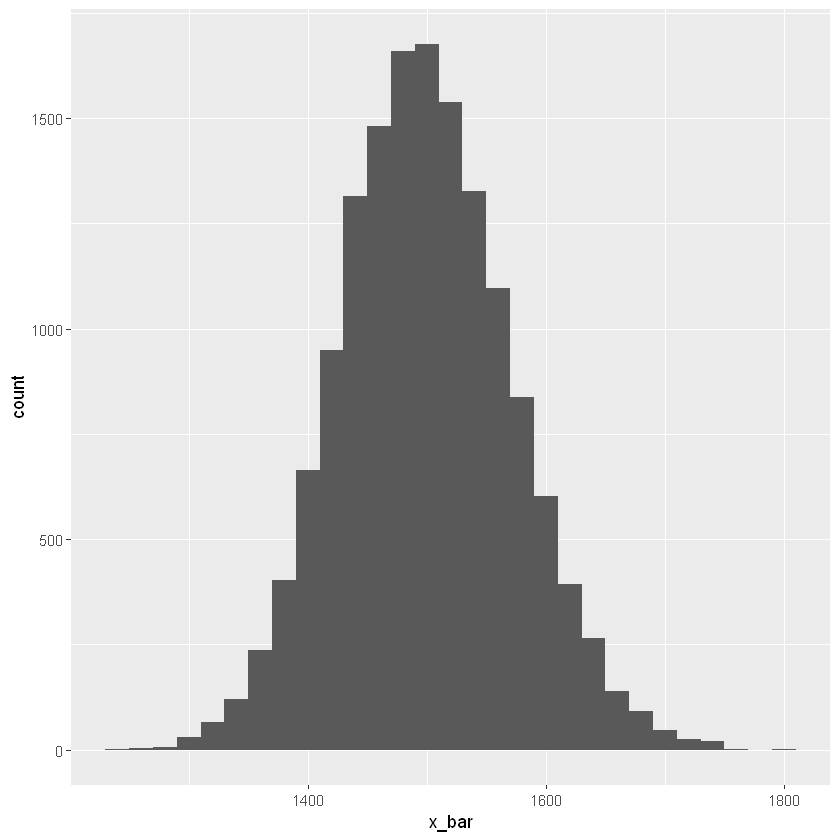

In [16]:
ggplot(data = sample_means50, aes(x = x_bar)) +
  geom_histogram(binwidth = 20)

The sampling distribution that we computed tells us much about estimating the average living area in homes in Ames.  Because the sample mean is an unbiased estimator, the sampling distribution is centered at the true average living area of the population, and the spread of the distribution indicates how much variability is induced by sampling only 50 home sales.

In the remainder of this section we will work on getting a sense of the effect that sample size has on our sampling distribution.

Use the app below to create sampling distributions of means of `area`s from samples of size 10, 50, and 100. Use 5,000 simulations. What does each observation in the sampling distribution represent? How does the mean, standard error, and shape of the sampling distribution change as the sample size increases? How (if at all) do these values change if you increase the number of simulations?

```R
shinyApp(
  ui <- fluidPage(
    
    # Sidebar with a slider input for number of bins 
    sidebarLayout(
      sidebarPanel(
        
        selectInput("selected_var",
                    "Variable:",
                    choices = list("area", "price"),
                    selected = "area"),         
        
        numericInput("n_samp",
                     "Sample size:",
                     min = 1,
                     max = nrow(ames),
                     value = 30),
        
        numericInput("n_sim",
                     "Number of samples:",
                     min = 1,
                     max = 30000,
                     value = 15000) 
        
      ),
      
      # Show a plot of the generated distribution
      mainPanel(
        plotOutput("sampling_plot"),
        verbatimTextOutput("sampling_mean"),
        verbatimTextOutput("sampling_se")
      )
    )
  ),
  
  # Define server logic required to draw a histogram
  server <- function(input, output) {
    
    # create sampling distribution
    sampling_dist <- reactive({
      ames[[input$selected_var]] %>%
        sample(size = input$n_samp * input$n_sim, replace = TRUE) %>%
        matrix(ncol = input$n_samp) %>%
        rowMeans() %>%
        data.frame(x_bar = .)
      #ames %>%
      #  rep_sample_n(size = input$n_samp, reps = input$n_sim, replace = TRUE) %>%
      #  summarise_(x_bar = mean(input$selected_var))
    })
    
    # plot sampling distribution
    output$sampling_plot <- renderPlot({
      x_min <- quantile(ames[[input$selected_var]], 0.1)
      x_max <- quantile(ames[[input$selected_var]], 0.9)
      
      ggplot(sampling_dist(), aes(x = x_bar)) +
        geom_histogram() +
        xlim(x_min, x_max) +
        ylim(0, input$n_sim * 0.35) +
        ggtitle(paste0("Sampling distribution of mean ", 
                       input$selected_var, " (n = ", input$n_samp, ")")) +
        xlab(paste("mean", input$selected_var)) +
        theme(plot.title = element_text(face = "bold", size = 16))
    })
    
    # mean of sampling distribution
    output$sampling_mean <- renderText({
      paste0("mean of sampling distribution = ", round(mean(sampling_dist()$x_bar), 2))
    })
    
    # mean of sampling distribution
    output$sampling_se <- renderText({
      paste0("SE of sampling distribution = ", round(sd(sampling_dist()$x_bar), 2))
    })
  },
  
  options = list(height = 500) 
)
```

Take a random sample of size 50 from `price`. Using this sample, what is your best point estimate of the population mean?

In [17]:
ames %>% sample_n(50) %>% summarise(mean(price))

mean(price)
<dbl>
197223.4


Since you have access to the population, simulate the sampling distribution for $\bar{x}_{price}$ by taking 5000 samples from the population of size 50 and computing 5000 sample means.  Store these means in a vector called `sample_means50`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be?

`summarise()` ungrouping output (override with `.groups` argument)



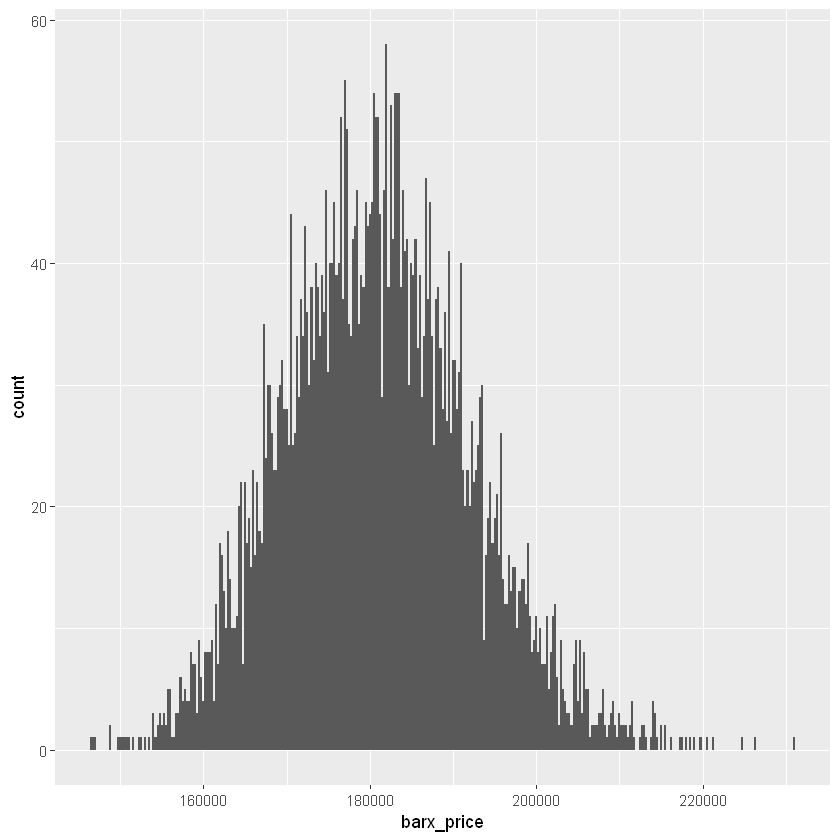

In [18]:
sample_means50 <- ames %>% rep_sample_n(size = 50, reps = 5000, replace = TRUE) %>%
                    summarise(barx_price = mean(price))

ggplot(data = sample_means50, aes(x = barx_price)) +
  geom_histogram(binwidth = 250)

Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called `sample_means150`. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50.  Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

`summarise()` ungrouping output (override with `.groups` argument)



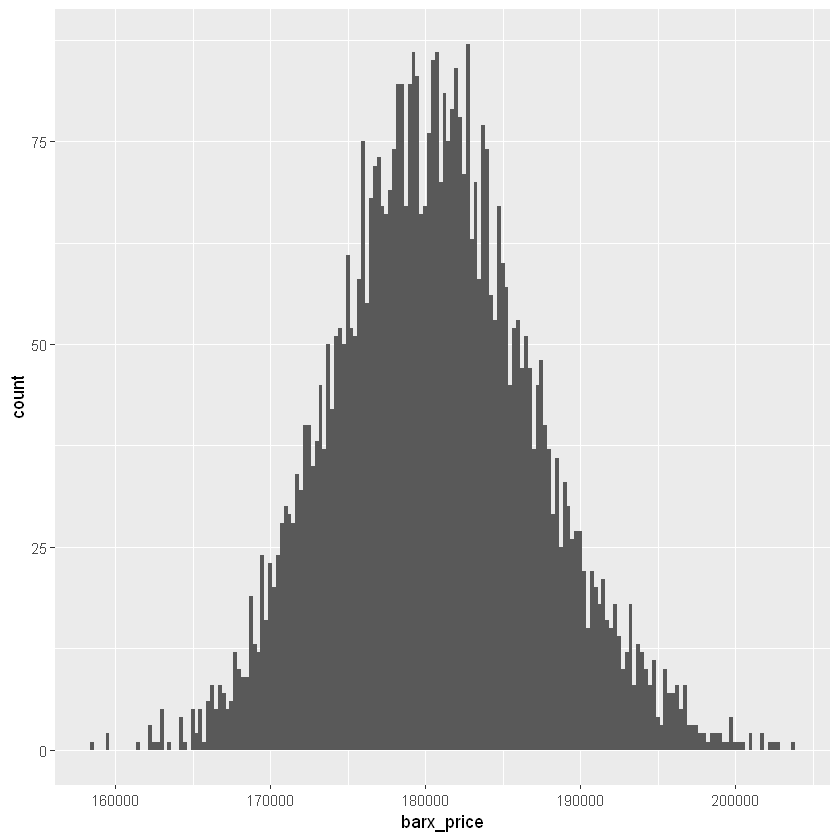

In [19]:
sample_means150 <- ames %>% rep_sample_n(size = 150, reps = 5000, replace = TRUE) %>%
                    summarise(barx_price = mean(price))

ggplot(data = sample_means150, aes(x = barx_price)) +
  geom_histogram(binwidth = 250)

In [20]:
summary(sample_means150$barx_price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 158607  176237  180476  180628  184788  203839 

So far, we have only focused on estimating the mean living area in homes in Ames. Now you'll try to estimate the mean home price.

Note that while you might be able to answer some of these questions using the app you are expected to write the required code and produce the necessary plots and summary statistics. You are welcomed to use the app for exploration.


Take a sample of size 15 from the population and calculate the mean `price` of the homes in this sample. Using this sample, what is your best point estimate of the population mean of prices of homes?

In [21]:
ames %>% sample_n(15) %>% summarise(mean(price))

mean(price)
<dbl>
199506.7


Since you have access to the population, simulate the sampling distribution for $\bar{x}_{price}$ by taking 2000 samples from the population of size 15 and computing 2000 sample means. Store these means in a vector called `sample_means15`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

`summarise()` ungrouping output (override with `.groups` argument)



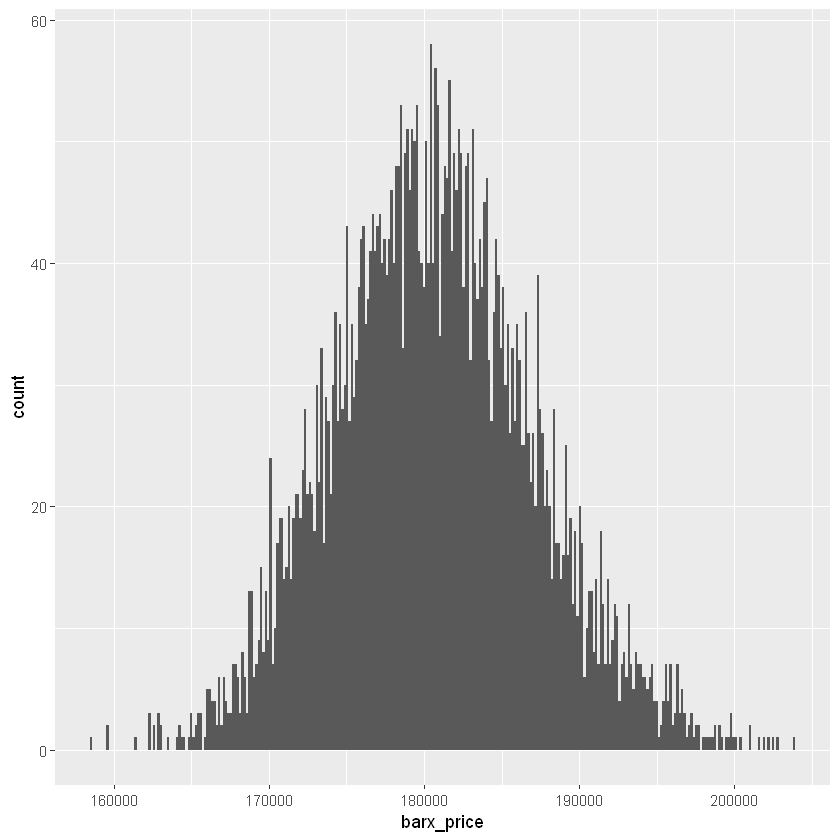

In [22]:
sample_means15 <- ames %>% rep_sample_n(size = 15, reps = 2000, replace = TRUE) %>%
                    summarise(barx_price = mean(price))

ggplot(data = sample_means150, aes(x = barx_price)) +
  geom_histogram(binwidth = 150)

In [23]:
summary(sample_means15$barx_price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 123513  165943  179036  180595  194171  265100 

Change your sample size from 15 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called `sample_means150`. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 15. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

`summarise()` ungrouping output (override with `.groups` argument)



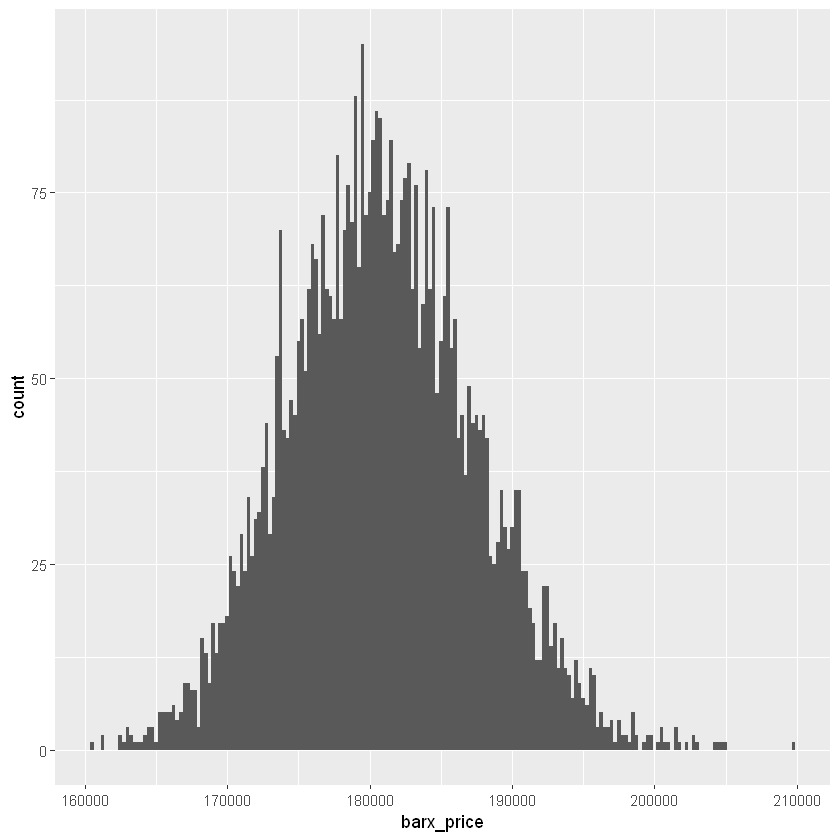

In [24]:
sample_means150 <- ames %>% rep_sample_n(size = 150, reps = 5000, replace = TRUE) %>%
                    summarise(barx_price = mean(price))

ggplot(data = sample_means150, aes(x = barx_price)) +
  geom_histogram(binwidth = 250)

In [25]:
summary(sample_means150$barx_price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 160430  176287  180640  180852  185174  209633 